In [19]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=14)
plt.rc('figure', figsize=(12, 7))

In [10]:
class Problem(object):
    def __init__(self):
        self.phi = 0.05
        self.K   = 1
        self.muw = 1
        self.mul = 5
        self.pL  = 2
        self.pR  = 1
        self.D   = 1
        self.T   = 1
    def kw(self, s):
        return s*s
    def kl(self, s):
        return (1-s)**2
    def s0(self, x):
        return np.zeros_like(x)
    def sL(self, t):
        return 1

In [44]:
class Mesh(object):
    def __init__(self, M, prob):
        self.prob = prob
        z = np.linspace(0, prob.D, M+1)
        x = (z[:-1] + z[1:]) / 2
        assert len(x) == M
        self.x = x
        self.s = np.empty_like(x)
        self.p = np.empty_like(x)
    def show(self):
        f = plt.figure(figsize=(18, 6))
        ax = f.add_subplot(1, 2, 1)
        ax.plot(self.x, self.p, 'r')
        ax.set_xlim(0, self.prob.D)
        ax.set_ylim(self.prob.pR, self.prob.pL)
        ax = f.add_subplot(1, 2, 2)
        ax.plot(self.x, self.s, 'b')
        ax.set_xlim(0, self.prob.D)
        ax.set_ylim(0, 1)

In [48]:
class Solver(object):
    def __init__(self, prob, mesh):
        self.prob = prob
        self.mesh = mesh
    def set_initial_cond(self):
        mesh = self.mesh
        prob = self.prob
        mesh.s = prob.s0(mesh.x)
    def step(self, dt):
        mesh = self.mesh
        prob = self.prob
        
        sbnd = (mesh.s[:-1] + mesh.s[1:]) / 2
        b = prob.kw(sbnd) / prob.muw + prob.kl(sbnd) / prob.mul
        
        M = len(mesh.x)
        matrix = np.zeros((3, M))
        rhs    = np.zeros(M)
        
        matrix[1, 0]    = matrix[1, -1] = 1
        matrix[0, 2:]   = b[1:]
        matrix[1, 1:-1] = -b[1:] - b[:-1]
        matrix[2, :-2]  = b[:-1]
        rhs[0]  = prob.pL
        rhs[-1] = prob.pR
        
        mesh.p = la.solve_banded((1, 1), matrix, rhs)

In [49]:
prob = Problem()
mesh = Mesh(50, prob)
solver = Solver(prob, mesh)

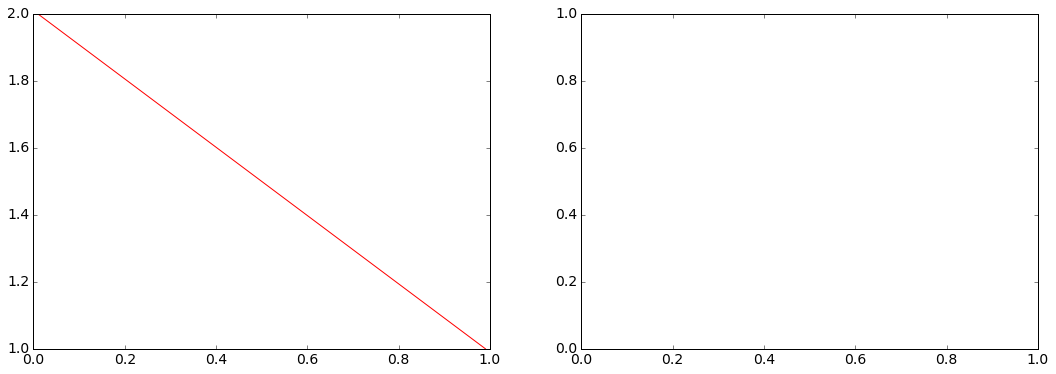

In [50]:
solver.set_initial_cond()
solver.step(0)
mesh.show()